In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import re

In [2]:
#Importation de jeu de données :

data=pd.read_csv("data.csv")

In [3]:
#les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) 
#et ses émissions de CO2 (TotalGHGEmissions).

In [4]:
numerical_cols = data.select_dtypes(include=['int64','float64'])
categorical_cols= data.select_dtypes(exclude=['int64','float64']) 

In [5]:
categorical_cols.nunique()

BuildingType                     5
PrimaryPropertyType             26
Neighborhood                    13
LargestPropertyUseType          58
SecondLargestPropertyUseType    48
ThirdLargestPropertyUseType     41
dtype: int64

In [6]:
numerical_cols.nunique()

CouncilDistrictCode                  7
NumberofBuildings                   17
NumberofFloors                      45
PropertyGFATotal                  1644
PropertyGFAParking                 362
ThirdLargestPropertyUseTypeGFA     323
ENERGYSTARScore                    100
SiteEUI(kBtu/sf)                  1781
SiteEnergyUse(kBtu)               3155
TotalGHGEmissions                 2890
GHGEmissionsIntensity              579
Building_Age                       115
distance_centre                   3026
dtype: int64

In [7]:
#on garde ENERGYSTARScore à côté
energystar_score = numerical_cols['ENERGYSTARScore'] #on garde cette variable à côté
numerical_cols=numerical_cols.drop(['ENERGYSTARScore'], axis=1)


In [8]:
data_model = pd.concat([categorical_cols, numerical_cols], axis=1)


In [9]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BuildingType                    3156 non-null   object 
 1   PrimaryPropertyType             3156 non-null   object 
 2   Neighborhood                    3156 non-null   object 
 3   LargestPropertyUseType          3156 non-null   object 
 4   SecondLargestPropertyUseType    3156 non-null   object 
 5   ThirdLargestPropertyUseType     3156 non-null   object 
 6   CouncilDistrictCode             3156 non-null   int64  
 7   NumberofBuildings               3156 non-null   float64
 8   NumberofFloors                  3156 non-null   float64
 9   PropertyGFATotal                3156 non-null   int64  
 10  PropertyGFAParking              3156 non-null   int64  
 11  ThirdLargestPropertyUseTypeGFA  3156 non-null   float64
 12  SiteEUI(kBtu/sf)                31

In [10]:
data_model.isna().sum().sort_values()

BuildingType                      0
GHGEmissionsIntensity             0
TotalGHGEmissions                 0
SiteEnergyUse(kBtu)               0
SiteEUI(kBtu/sf)                  0
ThirdLargestPropertyUseTypeGFA    0
PropertyGFAParking                0
PropertyGFATotal                  0
NumberofFloors                    0
NumberofBuildings                 0
CouncilDistrictCode               0
ThirdLargestPropertyUseType       0
SecondLargestPropertyUseType      0
LargestPropertyUseType            0
Neighborhood                      0
PrimaryPropertyType               0
Building_Age                      0
distance_centre                   0
dtype: int64

In [11]:
data_model.iloc[0:500]

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,distance_centre
0,NonResidential,Hotel,DOWNTOWN,Hotel,No Use,No Use,7,1.0,12.0,88434,0,0.0,78.9,6981428.0,249.43,2.64,88,0.496412
1,NonResidential,Hotel,DOWNTOWN,Hotel,Parking,Restaurant,7,1.0,11.0,103566,15064,4622.0,94.4,8354235.0,263.51,2.38,19,0.480394
2,NonResidential,Hotel,DOWNTOWN,Hotel,Parking,Swimming Pool,7,1.0,41.0,961990,0,0.0,96.6,73130656.0,2061.48,1.92,46,0.558193
3,NonResidential,Hotel,DOWNTOWN,Hotel,Parking,Swimming Pool,7,1.0,18.0,119890,12460,0.0,120.1,14829099.0,507.70,4.02,35,0.663901
4,Nonresidential COS,Other,DOWNTOWN,Police Station,No Use,No Use,7,1.0,2.0,97288,37198,0.0,135.7,12051984.0,304.62,2.81,16,0.739535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NonResidential,Large Office,GREATER DUWAMISH,Office,Multifamily Housing,Parking,2,1.0,1.0,158931,28381,26937.0,58.6,7577723.0,75.45,0.28,8,2.234169
496,NonResidential,Retail Store,MAGNOLIA / QUEEN ANNE,Retail Store,No Use,No Use,7,1.0,1.0,50660,0,0.0,47.3,2394843.0,46.23,0.76,37,2.786328
497,NonResidential,Small- and Mid-Sized Office,MAGNOLIA / QUEEN ANNE,Office,No Use,No Use,7,1.0,2.0,61929,0,0.0,53.9,2150536.0,49.26,0.70,78,2.682335
498,NonResidential,Large Office,MAGNOLIA / QUEEN ANNE,Office,Parking,Restaurant,7,1.0,5.0,162420,55971,2137.0,82.0,7649110.0,53.32,0.13,15,1.799059


In [12]:
data_model.isnull().any()

BuildingType                      False
PrimaryPropertyType               False
Neighborhood                      False
LargestPropertyUseType            False
SecondLargestPropertyUseType      False
ThirdLargestPropertyUseType       False
CouncilDistrictCode               False
NumberofBuildings                 False
NumberofFloors                    False
PropertyGFATotal                  False
PropertyGFAParking                False
ThirdLargestPropertyUseTypeGFA    False
SiteEUI(kBtu/sf)                  False
SiteEnergyUse(kBtu)               False
TotalGHGEmissions                 False
GHGEmissionsIntensity             False
Building_Age                      False
distance_centre                   False
dtype: bool

In [13]:
df_null2=data_model.isnull().sum().sort_values()
print(df_null2)

BuildingType                      0
GHGEmissionsIntensity             0
TotalGHGEmissions                 0
SiteEnergyUse(kBtu)               0
SiteEUI(kBtu/sf)                  0
ThirdLargestPropertyUseTypeGFA    0
PropertyGFAParking                0
PropertyGFATotal                  0
NumberofFloors                    0
NumberofBuildings                 0
CouncilDistrictCode               0
ThirdLargestPropertyUseType       0
SecondLargestPropertyUseType      0
LargestPropertyUseType            0
Neighborhood                      0
PrimaryPropertyType               0
Building_Age                      0
distance_centre                   0
dtype: int64


In [14]:
data_model.reset_index(inplace=True, drop=True)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error


In [16]:
#1-Preprocessing : Encodage et standardisation et Préparation des jeux d'entrainement et de test

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()


#X = data_model.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
#Y = data_model[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X = data_model.drop(['TotalGHGEmissions','GHGEmissionsIntensity','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)'], axis=1)
Y = data_model[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

numerical_cols=  X.select_dtypes(include=['int64','float64']).columns
categorical_cols= X.select_dtypes(exclude=['int64','float64']).columns
 

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols),
    ('numeric', numeric_transformer, numerical_cols)])

GHG_x_train,GHG_x_test, GHG_y_train, GHG_y_test = train_test_split(X, Y['TotalGHGEmissions'], test_size=0.2, random_state=42)
EUI_x_train,EUI_x_test, EUI_y_train, EUI_y_test = train_test_split(X, Y['SiteEnergyUse(kBtu)'], test_size=0.2, random_state=42)


In [17]:
def metrics(y_true, y_pred):
    r2=r2_score(y_true, y_pred)
    rmse=mean_squared_error(y_true, y_pred ,squared=False)
    dict_metrics = {"Métrique":["R²", "RMSE"], "model":[r2,rmse]}
    data_metrics = pd.DataFrame(dict_metrics)
    return data_metrics

def metrics_EUI(y_true, y_pred):
    r2=r2_score(y_true, y_pred)
    rmse=mean_squared_error(y_true, y_pred ,squared=False)
    dict_metrics = {"Métrique":["R²", "RMSE/10**7"], "model":[r2,rmse/10**7]}
    data_metrics = pd.DataFrame(dict_metrics)
    return data_metrics

In [173]:

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réelles",fontsize=15)
    plt.ylabel("Valeurs prédites",fontsize=15)
    plt.title("Valeurs prédites VS valeurs réelles | Variable {}".format(title), fontdict=font_title, fontsize=18)
    plt.show()

In [19]:
#2-Régression linéaire multivariée :modèle baseline

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:

param_rlm = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

EUI_rlm_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('EUI_grid_search_rlm', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                            func=np.log,  #func=np.log1p,
                            inverse_func=np.exp),   #inverse_func=np.expm1),
                            param_grid=param_rlm,
                            cv=5,
                            n_jobs = -1))])

GHG_rlm_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('GHG_grid_search_rlm', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                            func=np.log1p,
                            inverse_func=np.expm1),
                            param_grid=param_rlm,
                            cv=5,
                            n_jobs = -1))])



In [22]:
for param in GHG_rlm_grid_cv.get_params().keys():
    print(param)

memory
steps
verbose
preprocessor
GHG_grid_search_rlm
preprocessor__n_jobs
preprocessor__remainder
preprocessor__sparse_threshold
preprocessor__transformer_weights
preprocessor__transformers
preprocessor__verbose
preprocessor__categorical
preprocessor__numeric
preprocessor__categorical__categories
preprocessor__categorical__drop
preprocessor__categorical__dtype
preprocessor__categorical__handle_unknown
preprocessor__categorical__sparse
preprocessor__numeric__copy
preprocessor__numeric__with_mean
preprocessor__numeric__with_std
GHG_grid_search_rlm__cv
GHG_grid_search_rlm__error_score
GHG_grid_search_rlm__estimator__check_inverse
GHG_grid_search_rlm__estimator__func
GHG_grid_search_rlm__estimator__inverse_func
GHG_grid_search_rlm__estimator__regressor__copy_X
GHG_grid_search_rlm__estimator__regressor__fit_intercept
GHG_grid_search_rlm__estimator__regressor__n_jobs
GHG_grid_search_rlm__estimator__regressor__normalize
GHG_grid_search_rlm__estimator__regressor__positive
GHG_grid_search_rlm_

In [23]:
#2.1-Régression linéaire gridsearchcv pour SiteEnergyUse(kBtu)

EUI_rlm_model_grid= EUI_rlm_grid_cv.fit(EUI_x_train, EUI_y_train)

In [24]:
results_EUI_rlm_grid = pd.DataFrame.from_dict(EUI_rlm_model_grid.named_steps["EUI_grid_search_rlm"].cv_results_).sort_values('rank_test_score')
results_EUI_rlm_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.215611,0.026880,0.003124,0.006249,False,True,"{'regressor__fit_intercept': False, 'regressor...",-13.756865,-6.018744,-76.206338,0.431277,-2.583956e+26,-5.167913e+25,1.033583e+26,1
3,0.171391,0.009927,0.000000,0.000000,False,False,"{'regressor__fit_intercept': False, 'regressor...",-13.756865,-6.018744,-76.206338,0.431277,-2.583956e+26,-5.167913e+25,1.033583e+26,1
0,0.078121,0.009881,0.000000,0.000000,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-13.748746,-6.008740,-76.205763,0.431287,-2.584031e+26,-5.168063e+25,1.033613e+26,3
1,0.199986,0.020727,0.003124,0.006248,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-13.747829,-6.008421,-76.205120,0.431302,-2.584052e+26,-5.168104e+25,1.033621e+26,4


In [25]:
mean_test_score_EUI_rlm_grid= EUI_rlm_model_grid.named_steps["EUI_grid_search_rlm"].best_score_
mean_test_score_EUI_rlm_grid

-5.16791266846163e+25

In [26]:
meilleur_params_EUI_rlm_grid=EUI_rlm_model_grid.named_steps["EUI_grid_search_rlm"].best_params_
meilleur_params_EUI_rlm_grid

{'regressor__fit_intercept': False, 'regressor__normalize': True}

In [27]:
#2.2-Régression linéaire avec gridsearchcv pour GHGEmissionsIntensity


GHG_rlm_model_grid = GHG_rlm_grid_cv.fit(GHG_x_train, GHG_y_train)

In [28]:
results_GHG_rlm_grid= pd.DataFrame.from_dict(GHG_rlm_model_grid.named_steps["GHG_grid_search_rlm"].cv_results_).sort_values('rank_test_score')
results_GHG_rlm_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.180697,0.018422,0.001599,4.894347e-04,False,True,"{'regressor__fit_intercept': False, 'regressor...",-20.579916,0.091149,-133.603344,0.667660,-1.487908e+27,-2.975816e+26,5.951632e+26,1
3,0.186965,0.018199,0.000599,4.894732e-04,False,False,"{'regressor__fit_intercept': False, 'regressor...",-20.579916,0.091149,-133.603344,0.667660,-1.487908e+27,-2.975816e+26,5.951632e+26,1
1,0.181097,0.027577,0.001200,3.997804e-04,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-20.578108,0.095401,-133.617701,0.667668,-1.487910e+27,-2.975820e+26,5.951639e+26,3
0,0.050569,0.010625,0.001001,9.464947e-07,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-20.577857,0.095651,-133.609680,0.667648,-1.487924e+27,-2.975848e+26,5.951695e+26,4


In [29]:
mean_test_score_GHG_rlm_grid= GHG_rlm_model_grid.named_steps["GHG_grid_search_rlm"].best_score_
mean_test_score_GHG_rlm_grid

-2.9758159953040538e+26

In [30]:
meilleur_params_GHG_rlm_grid=GHG_rlm_model_grid.named_steps["GHG_grid_search_rlm"].best_params_
meilleur_params_GHG_rlm_grid

{'regressor__fit_intercept': False, 'regressor__normalize': True}

In [31]:
#Calculer r2 et rmse model Régression linéaire grid_cv

In [32]:
Y_pred_GHG_rlm_grid =GHG_rlm_model_grid.predict(GHG_x_test)

In [33]:
Y_pred_GHG_rlm_grid

array([2.20256397e+01, 2.81925294e+01, 3.85360460e+01, 1.12637015e+02,
       1.53156508e+02, 7.63205806e+01, 1.71604180e+01, 2.13013832e+01,
       5.50167391e+01, 9.72787342e+00, 8.01923776e+01, 1.69595386e+02,
       5.08050109e+01, 2.31259853e+01, 3.32021515e+02, 8.53828312e+01,
       6.57379170e+01, 8.76526142e+01, 2.98893535e+01, 1.63337577e+01,
       2.00943035e+01, 2.84651529e+01, 2.32667095e+01, 3.31426978e+02,
       8.11085997e+01, 4.79202297e+01, 1.89596821e+01, 2.08827912e+01,
       1.31418523e+02, 7.27691091e+01, 4.22749932e+01, 1.37564666e+02,
       1.80648391e+02, 6.65796470e+01, 3.20848252e+01, 1.45673489e+02,
       8.62111903e+01, 2.67131173e+01, 1.05940250e+01, 6.50185320e+01,
       1.37860772e+02, 2.52773942e+01, 3.01922114e+01, 2.61050231e+01,
       1.16912569e+02, 9.15648676e+01, 5.76396679e+01, 3.48876040e+01,
       5.85365078e+01, 2.69239258e+01, 4.42580621e+01, 3.58615058e+03,
       3.15256359e+01, 7.12181279e+01, 1.54940956e+01, 2.95736793e+01,
      

In [34]:
GHG_y_test

3051     21.05
2679     12.92
2959      6.73
2783     17.45
139     221.62
         ...  
1229     18.91
2486      3.71
2896     22.38
2232     28.81
2619     24.31
Name: TotalGHGEmissions, Length: 632, dtype: float64

In [35]:
Y_pred_EUI_rlm_grid =EUI_rlm_model_grid.predict(EUI_x_test)

In [36]:
Y_pred_EUI_rlm_grid

array([2.02933987e+06, 1.04383211e+06, 2.47200802e+06, 4.53818728e+06,
       4.36775634e+06, 3.99243091e+06, 9.48543848e+05, 1.80300407e+06,
       2.10545032e+06, 8.13968173e+05, 3.67865837e+06, 1.08630886e+07,
       2.43729744e+06, 1.76921083e+06, 3.11254124e+07, 2.10251999e+06,
       1.48216050e+06, 3.95990634e+06, 1.58502356e+06, 9.80446482e+05,
       1.51354571e+06, 2.07617003e+06, 1.74348420e+06, 3.60501385e+07,
       3.04062198e+06, 1.21108954e+06, 1.07183057e+06, 1.93621788e+06,
       8.41183017e+06, 2.13193540e+06, 1.71723469e+06, 3.93872602e+06,
       6.27505802e+06, 4.24021755e+06, 2.69573890e+06, 4.43635850e+06,
       7.87882157e+06, 1.30193137e+06, 5.52645031e+05, 6.49248116e+06,
       1.27035449e+07, 1.54985280e+06, 1.13830479e+06, 2.34426821e+06,
       3.17688655e+06, 4.44037957e+06, 2.92569401e+06, 2.66755557e+06,
       2.85520527e+06, 1.28036670e+06, 2.06040496e+06, 1.30337394e+08,
       2.05376526e+06, 6.95081284e+06, 9.16623753e+05, 7.99693166e+05,
      

In [37]:
EUI_y_test

3051    3.020002e+06
2679    4.404192e+05
2959    9.772303e+05
2783    1.001964e+06
139     7.338511e+06
            ...     
1229    1.535784e+06
2486    5.317372e+05
2896    8.264887e+05
2232    1.345026e+06
2619    2.190460e+06
Name: SiteEnergyUse(kBtu), Length: 632, dtype: float64

In [38]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [39]:
print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_y_test, Y_pred_GHG_rlm_grid)))
    
print("rmse/ (TotalGHGEmissions) :"+str(mean_squared_error(GHG_y_test, Y_pred_GHG_rlm_grid ,squared=False)))

r2 (TotalGHGEmissions)  : 0.3414835819246025
rmse/ (TotalGHGEmissions) :436.31130077068775


In [40]:
GHG_metrics_rlm_grid = metrics(GHG_y_test, Y_pred_GHG_rlm_grid).rename(columns={'Métrique':'Métrique (TotalGHGEmissions)','model':'LinearRegression GridSearch'})
GHG_metrics_rlm_grid

,Métrique (TotalGHGEmissions),LinearRegression GridSearch
0,R²,0.341484
1,RMSE,436.311301


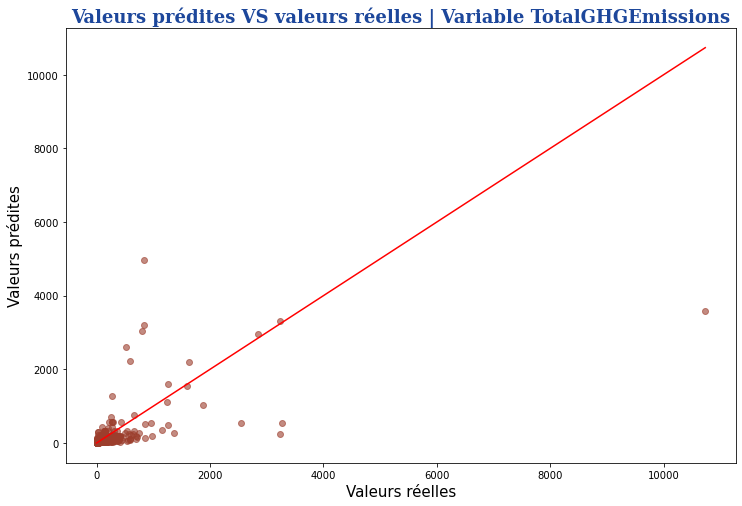

In [176]:
#Visualisation graphique avec le Régression linéaire grid_cv

#1-Affichage des valeurs prédites vs valeurs réelles pour émissions de CO2
plot_pred_true(GHG_y_test,Y_pred_GHG_rlm_grid , color="#9C3E2D", title="TotalGHGEmissions")

In [42]:
print("r2 (SiteEnergyUse(kBtu))  : "+str(r2_score(EUI_y_test, Y_pred_EUI_rlm_grid)))
    
print("rmse/10**7 (SiteEnergyUse(kBtu)) :"+str(mean_squared_error(EUI_y_test, Y_pred_EUI_rlm_grid ,squared=False)/10**7))

r2 (SiteEnergyUse(kBtu))  : -1.911719139386534
rmse/10**7 (SiteEnergyUse(kBtu)) :3.0065735456178797


In [43]:
EUI_metrics_rlm_grid = metrics_EUI(EUI_y_test, Y_pred_EUI_rlm_grid).rename(columns={'Métrique':'Métrique (SiteEnergyUse(kBtu))','model':'LinearRegression GridSearch'})
EUI_metrics_rlm_grid

,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch
0,R²,-1.911719
1,RMSE/10**7,3.006574


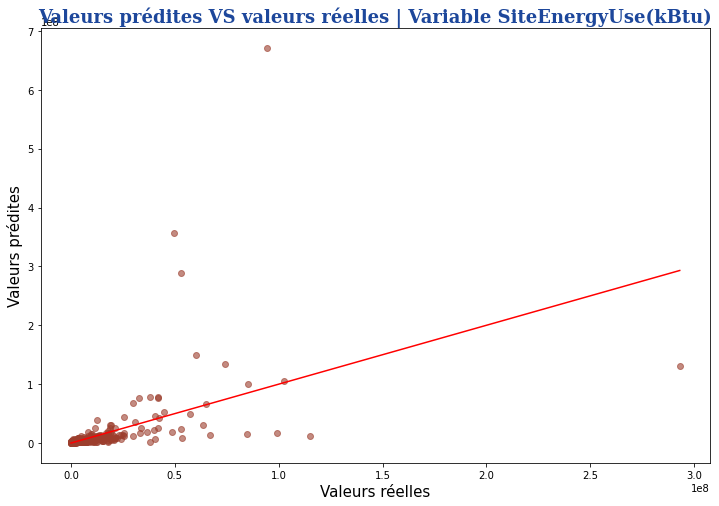

In [177]:
#Visualisation graphique avec le Régression linéaire grid_cv
#2-Affichage des valeurs prédites vs valeurs réelles pour SiteEnergyUse(kBtu)
plot_pred_true(EUI_y_test,Y_pred_EUI_rlm_grid , color="#9C3E2D", title="SiteEnergyUse(kBtu)")

In [ ]:
#2-Modèle RandomForestRegressor avec GridsearchCV

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50,100,300,500],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}


rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                            regressor=RandomForestRegressor(),
                            func=np.log1p,
                            inverse_func=np.expm1),
                            param_grid=param_rfr,
                            cv=5,
                            n_jobs = -1))])

In [45]:
#2.1-grid_search_rfr pour GHGEmissionsIntensity


GHG_rfr_model_grid = rfr_grid_cv.fit(GHG_x_train, GHG_y_train)

In [46]:
meilleur_model_rfr_GHG= GHG_rfr_model_grid.named_steps["grid_search_rfr"].best_estimator_
meilleur_model_rfr_GHG

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=RandomForestRegressor(bootstrap=False,
                                                           max_depth=50,
                                                           max_features='sqrt'))

In [47]:
meilleur_mts_GHG= GHG_rfr_model_grid.named_steps["grid_search_rfr"].best_score_

In [48]:
meilleur_mts_GHG

0.5552867323240365

In [49]:
meilleur_params_GHG = GHG_rfr_model_grid.named_steps["grid_search_rfr"].best_params_

In [50]:
meilleur_params_GHG

{'regressor__bootstrap': False,
 'regressor__max_depth': 50,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [51]:
results_GHG_rfr_grid = pd.DataFrame.from_dict(GHG_rfr_model_grid.named_steps["grid_search_rfr"].cv_results_).sort_values('rank_test_score')
results_GHG_rfr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
240,4.613026,0.034613,0.048753,8.181760e-03,False,50,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.748193,0.611113,0.677087,0.369078,0.370964,0.555287,0.157362,1
288,4.590310,0.043523,0.046873,9.881288e-03,False,300,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.722216,0.662409,0.626149,0.357092,0.298113,0.533196,0.171663,2
264,4.613034,0.022185,0.053122,1.593223e-02,False,100,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.657049,0.643337,0.653956,0.367401,0.319533,0.528255,0.151705,3
312,4.637181,0.058793,0.046874,6.289914e-07,False,500,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.660460,0.619035,0.653026,0.358153,0.341407,0.526416,0.144994,4
216,3.490386,0.091424,0.049996,1.169184e-02,False,25,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.683065,0.591868,0.629210,0.365768,0.328584,0.519699,0.144298,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.378099,0.024998,0.028123,6.250286e-03,False,5,log2,10,5,"{'regressor__bootstrap': False, 'regressor__ma...",0.006019,-0.004896,-0.009117,-0.001669,-0.017505,-0.005434,0.007809,332
189,0.396848,0.040260,0.031248,9.880987e-03,False,5,log2,10,2,"{'regressor__bootstrap': False, 'regressor__ma...",-0.001926,-0.002957,-0.008303,-0.005198,-0.014136,-0.006504,0.004398,333
23,0.459344,0.032172,0.031249,6.289914e-07,True,5,log2,10,10,"{'regressor__bootstrap': True, 'regressor__max...",-0.009348,-0.012697,-0.019451,-0.005899,-0.024203,-0.014320,0.006667,334
21,0.456218,0.024999,0.031248,9.881364e-03,True,5,log2,10,2,"{'regressor__bootstrap': True, 'regressor__max...",-0.011351,-0.012357,-0.021426,-0.007226,-0.024105,-0.015293,0.006395,335


In [52]:
#Calculer r2 et rmse model rfr_grid

In [53]:
Y_pred_GHG_rfr_grid =GHG_rfr_model_grid.predict(GHG_x_test)

In [54]:
GHG_y_test


3051     21.05
2679     12.92
2959      6.73
2783     17.45
139     221.62
         ...  
1229     18.91
2486      3.71
2896     22.38
2232     28.81
2619     24.31
Name: TotalGHGEmissions, Length: 632, dtype: float64

In [55]:
Y_pred_GHG_rfr_grid

array([3.80260161e+01, 1.21077545e+01, 1.23912478e+01, 2.27005879e+01,
       1.83431351e+02, 1.13412289e+02, 1.35688424e+01, 1.05572867e+01,
       6.20707072e+01, 1.05715730e+01, 3.86092081e+01, 1.45028124e+02,
       3.87054277e+01, 4.78022991e+01, 1.82392721e+02, 2.29980000e+02,
       5.70370650e+01, 9.24322437e+01, 1.64162912e+02, 4.60525529e+00,
       7.09764266e+00, 7.24509170e+01, 8.71997454e+00, 3.63109185e+02,
       7.91975655e+01, 6.29612763e+01, 1.92003266e+00, 1.19787361e+01,
       1.88657029e+02, 5.30215238e+01, 1.18892286e+02, 6.48898698e+01,
       3.69322852e+02, 1.08884406e+02, 4.44223762e+01, 1.17537517e+02,
       2.00130335e+02, 1.13099890e+01, 3.63297536e+01, 4.77800000e+01,
       8.48133764e+02, 2.02231953e+01, 1.82209275e+02, 1.78453289e+01,
       1.26768018e+02, 1.28016046e+02, 2.35697196e+01, 4.47452689e+01,
       6.27334220e+01, 3.73747133e+01, 2.41000000e+00, 1.04134476e+04,
       5.44599156e+01, 5.96795419e+01, 5.96645758e+00, 5.87178313e+00,
      

In [56]:

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_y_test, Y_pred_GHG_rfr_grid)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_y_test, Y_pred_GHG_rfr_grid ,squared=False)))

r2 (TotalGHGEmissions)  : 0.9258614731090488
rmse (TotalGHGEmissions) :146.3979968309147


In [57]:
GHG_metrics_rfr_grid = metrics(GHG_y_test, Y_pred_GHG_rfr_grid).rename(columns={'Métrique':'Métrique (TotalGHGEmissions)','model':'RandomForestRegressor GridSearch'})
GHG_metrics_rfr_grid

,Métrique (TotalGHGEmissions),RandomForestRegressor GridSearch
0,R²,0.925861
1,RMSE,146.397997


In [58]:
GHG_metrics1 = pd.concat([GHG_metrics_rlm_grid,GHG_metrics_rfr_grid["RandomForestRegressor GridSearch"]], axis=1)
GHG_metrics1

,Métrique (TotalGHGEmissions),LinearRegression GridSearch,RandomForestRegressor GridSearch
0,R²,0.341484,0.925861
1,RMSE,436.311301,146.397997


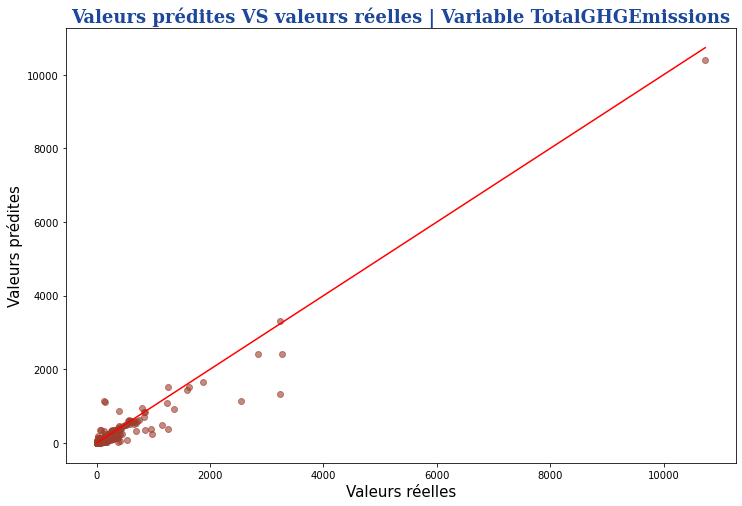

In [175]:
#Visualisation graphique avec le modèle RandomForestRegressor grid_cv

#1-Affichage des valeurs prédites vs valeurs réelles pour émissions de CO2
plot_pred_true(GHG_y_test,Y_pred_GHG_rfr_grid , color="#9C3E2D", title="TotalGHGEmissions")

In [60]:
#2.2-grid_search_rfr pour SiteEnergyUse(kBtu) 

EUI_x_train,EUI_x_test, EUI_y_train, EUI_y_test = train_test_split(X, Y['SiteEnergyUse(kBtu)'], test_size=0.2, random_state=42)


In [61]:

EUI_rfr_model_grid = rfr_grid_cv.fit(EUI_x_train, EUI_y_train)

In [62]:
results_EUI_rfr_grid = pd.DataFrame.from_dict(EUI_rfr_model_grid.named_steps["grid_search_rfr"].cv_results_).sort_values('rank_test_score')
results_EUI_rfr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
288,4.809209,0.234305,0.050772,6.301802e-03,False,300,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.831608,0.679562,0.670987,0.378223,0.207154,0.553507,0.227031,1
264,4.618433,0.065248,0.056247,1.249970e-02,False,100,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.809807,0.625420,0.696686,0.382752,0.219765,0.546886,0.215260,2
312,4.697554,0.135485,0.047753,3.657854e-03,False,500,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.802383,0.645010,0.683968,0.371786,0.200432,0.540716,0.220997,3
216,3.521634,0.058957,0.043748,6.250143e-03,False,25,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.766854,0.654168,0.694974,0.368792,0.204216,0.537801,0.214734,4
324,4.562720,0.367176,0.053122,7.653994e-03,False,500,log2,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.759340,0.653732,0.660017,0.367315,0.226611,0.533403,0.201626,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.356226,0.020727,0.031247,9.464947e-07,False,5,log2,10,5,"{'regressor__bootstrap': False, 'regressor__ma...",0.012877,0.030084,0.017507,0.015849,-0.003050,0.014653,0.010623,332
191,0.374974,0.038270,0.024999,7.654325e-03,False,5,log2,10,10,"{'regressor__bootstrap': False, 'regressor__ma...",0.018007,0.032783,0.022581,0.005086,-0.005592,0.014573,0.013448,333
23,0.449968,0.018221,0.034374,6.249237e-03,True,5,log2,10,10,"{'regressor__bootstrap': True, 'regressor__max...",0.002645,0.040122,0.003913,0.005318,-0.011470,0.008105,0.017108,334
22,0.456219,0.036172,0.034374,1.169096e-02,True,5,log2,10,5,"{'regressor__bootstrap': True, 'regressor__max...",0.000081,0.017977,0.002508,0.010275,-0.007158,0.004737,0.008650,335


In [63]:
meilleur_mts_EUI = EUI_rfr_model_grid.named_steps["grid_search_rfr"].best_score_
meilleur_mts_EUI

0.5535068911114971

In [64]:
meilleur_params_EUI =EUI_rfr_model_grid.named_steps["grid_search_rfr"].best_params_
meilleur_params_EUI

{'regressor__bootstrap': False,
 'regressor__max_depth': 300,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [65]:
Y_pred_EUI_rfr_grid =EUI_rfr_model_grid.predict(EUI_x_test)

In [66]:
EUI_y_test

3051    3.020002e+06
2679    4.404192e+05
2959    9.772303e+05
2783    1.001964e+06
139     7.338511e+06
            ...     
1229    1.535784e+06
2486    5.317372e+05
2896    8.264887e+05
2232    1.345026e+06
2619    2.190460e+06
Name: SiteEnergyUse(kBtu), Length: 632, dtype: float64

In [67]:
Y_pred_EUI_rfr_grid

array([3.08554749e+06, 3.93493000e+05, 8.78052437e+05, 1.04322088e+06,
       7.06427233e+06, 7.80673025e+06, 9.99762455e+05, 1.03888491e+06,
       1.68691570e+06, 8.10636875e+05, 3.17602629e+06, 8.50051608e+06,
       1.85804693e+06, 4.98067499e+06, 1.46579457e+07, 5.88988200e+06,
       1.62674179e+06, 6.34500950e+06, 3.49366283e+06, 4.52215952e+05,
       9.82323323e+05, 2.96310891e+06, 1.35122546e+06, 3.21410700e+07,
       2.21953806e+06, 1.06390990e+06, 2.45784124e+05, 1.70552360e+06,
       8.34996167e+06, 1.69603589e+06, 3.07698554e+06, 1.57614144e+06,
       9.42688748e+06, 5.70567864e+06, 1.87817767e+06, 2.32897647e+06,
       8.47550740e+06, 4.78966433e+05, 1.06845061e+06, 5.91700000e+06,
       2.41452238e+07, 1.17632127e+06, 6.59969181e+06, 2.50617287e+06,
       3.58168985e+06, 5.57401421e+06, 6.26185583e+05, 2.43578290e+06,
       4.72762924e+06, 1.94476448e+06, 3.45399000e+05, 2.76942565e+08,
       2.36649375e+06, 8.33251412e+06, 6.64666975e+05, 3.32087236e+05,
      

In [68]:
print("r2 (SiteEnergyUse(kBtu))  : "+str(r2_score(EUI_y_test, Y_pred_EUI_rfr_grid)))
    
print("rmse/10**7 (SiteEnergyUse(kBtu)) :"+str(mean_squared_error(EUI_y_test, Y_pred_EUI_rfr_grid ,squared=False)/10**7))

r2 (SiteEnergyUse(kBtu))  : 0.9249122213114529
rmse/10**7 (SiteEnergyUse(kBtu)) :0.48281607333885684


In [69]:
EUI_metrics_rfr_grid = metrics_EUI(EUI_y_test, Y_pred_EUI_rfr_grid).rename(columns={'Métrique':'Métrique (SiteEnergyUse(kBtu))','model':'RandomForestRegressor GridSearch'})
EUI_metrics1 = pd.concat([EUI_metrics_rlm_grid,EUI_metrics_rfr_grid["RandomForestRegressor GridSearch"]], axis=1)
EUI_metrics1

,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch,RandomForestRegressor GridSearch
0,R²,-1.911719,0.924912
1,RMSE/10**7,3.006574,0.482816


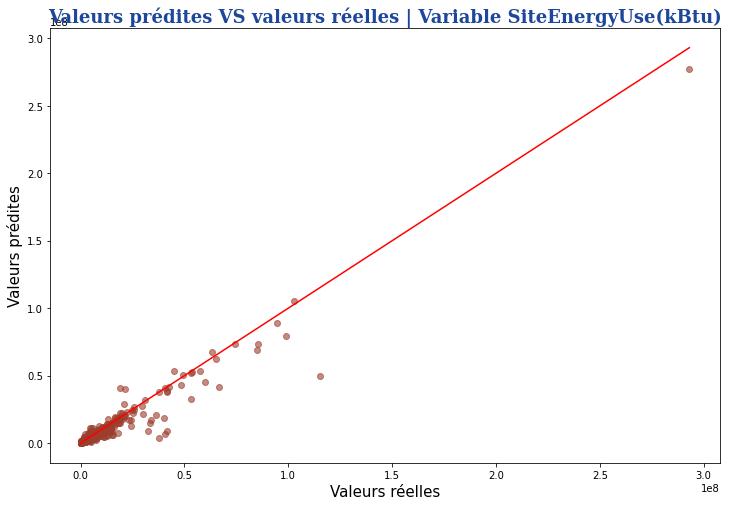

In [174]:
#Visualisation graphique avec le modèle RandomForestRegressor grid_cv
#2-Affichage des valeurs prédites vs valeurs réelles pour SiteEnergyUse(kBtu)
plot_pred_true(EUI_y_test,Y_pred_EUI_rfr_grid , color="#9C3E2D", title="SiteEnergyUse(kBtu)")

In [ ]:
#3-Modèle Support Vector Regression (SVR)

In [71]:
from sklearn.svm import LinearSVR

param_svm = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svm_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svm', GridSearchCV(TransformedTargetRegressor(regressor=LinearSVR(),func=np.log1p,inverse_func=np.expm1),param_grid=param_svm,cv=5,n_jobs = -1))])


In [72]:
EUI_svm_model_grid= svm_grid_cv.fit(EUI_x_train, EUI_y_train)


In [73]:
results_EUI_svm_grid = pd.DataFrame.from_dict(EUI_svm_model_grid.named_steps["grid_search_svm"].cv_results_).sort_values('rank_test_score')
results_EUI_svm_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__epsilon,param_regressor__loss,param_regressor__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.006247,0.007651,0.000000,0.000000,0.0001,0,squared_epsilon_insensitive,10,"{'regressor__C': 0.0001, 'regressor__epsilon':...",-0.110862,-0.188068,-0.165900,-0.096783,-5.230038e-02,-1.227828e-01,4.879981e-02,1
5,0.006250,0.007655,0.000000,0.000000,0.0001,0,squared_epsilon_insensitive,1000,"{'regressor__C': 0.0001, 'regressor__epsilon':...",-0.110862,-0.188068,-0.165900,-0.096783,-5.230038e-02,-1.227828e-01,4.879981e-02,2
4,0.006250,0.007654,0.003125,0.006250,0.0001,0,squared_epsilon_insensitive,100,"{'regressor__C': 0.0001, 'regressor__epsilon':...",-0.110862,-0.188068,-0.165900,-0.096783,-5.230038e-02,-1.227828e-01,4.879982e-02,3
11,0.006246,0.007650,0.000000,0.000000,0.0001,0.01,squared_epsilon_insensitive,1000,"{'regressor__C': 0.0001, 'regressor__epsilon':...",-0.110864,-0.188073,-0.165902,-0.096784,-5.230085e-02,-1.227847e-01,4.880106e-02,4
9,0.003125,0.006251,0.000000,0.000000,0.0001,0.01,squared_epsilon_insensitive,10,"{'regressor__C': 0.0001, 'regressor__epsilon':...",-0.110864,-0.188073,-0.165902,-0.096784,-5.230085e-02,-1.227847e-01,4.880107e-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.009374,0.007654,0.000000,0.000000,0.1,0.1,epsilon_insensitive,10,"{'regressor__C': 0.1, 'regressor__epsilon': 0....",-356.144503,-195.872867,-10105.118918,-31.903426,-6.577693e+42,-1.315539e+42,2.631077e+42,176
114,0.009374,0.007654,0.000000,0.000000,0.1,0.01,epsilon_insensitive,10,"{'regressor__C': 0.1, 'regressor__epsilon': 0....",-296.160318,-83.462264,-11067.387449,-38.786086,-9.462472e+42,-1.892494e+42,3.784989e+42,177
108,0.008785,0.006616,0.001204,0.000983,0.1,0,epsilon_insensitive,10,"{'regressor__C': 0.1, 'regressor__epsilon': 0,...",-583.943796,-199.454286,-10448.896744,-96.039005,-2.281144e+43,-4.562289e+42,9.124577e+42,178
150,0.022960,0.006843,0.000200,0.000400,1.0,0.01,epsilon_insensitive,10,"{'regressor__C': 1.0, 'regressor__epsilon': 0....",-5442.273760,-15759.753224,-12544.671236,-849.492746,-9.734329e+43,-1.946866e+43,3.893732e+43,179


In [74]:
mean_test_score_EUI_svm_grid= EUI_svm_model_grid.named_steps["grid_search_svm"].best_score_
mean_test_score_EUI_svm_grid

-0.12278281787736547

In [75]:

meilleur_params_EUI_svm_grid=EUI_svm_model_grid.named_steps["grid_search_svm"].best_params_
meilleur_params_EUI_svm_grid


{'regressor__C': 0.0001,
 'regressor__epsilon': 0,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__max_iter': 10}

In [76]:
GHG_svm_model_grid = svm_grid_cv.fit(GHG_x_train, GHG_y_train)

In [77]:
results_GHG_svm_grid= pd.DataFrame.from_dict(GHG_svm_model_grid.named_steps["grid_search_svm"].cv_results_).sort_values('rank_test_score')
results_GHG_svm_grid
mean_test_score_GHG_svm_grid= GHG_svm_model_grid.named_steps["grid_search_svm"].best_score_
mean_test_score_GHG_svm_grid
meilleur_params_GHG_svm_grid=GHG_svm_model_grid.named_steps["grid_search_svm"].best_params_
meilleur_params_GHG_svm_grid

Y_pred_GHG_svm_grid =GHG_svm_model_grid.predict(GHG_x_test)

Y_pred_EUI_svm_grid =EUI_svm_model_grid.predict(EUI_x_test)

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_y_test, Y_pred_GHG_svm_grid)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_y_test, Y_pred_GHG_svm_grid ,squared=False)))


GHG_metrics_svm_grid = metrics(GHG_y_test, Y_pred_GHG_svm_grid).rename(columns={'Métrique':'Métrique (TotalGHGEmissions) ','model':'LinearSVR GridSearch'})
GHG_metrics_svm_grid

GHG_metrics2 = pd.concat([GHG_metrics1,GHG_metrics_svm_grid["LinearSVR GridSearch"]], axis=1)
GHG_metrics2

r2 (TotalGHGEmissions)  : -0.056052897872072016
rmse (TotalGHGEmissions) :552.5301667274625


,Métrique (TotalGHGEmissions),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch
0,R²,0.341484,0.925861,-0.056053
1,RMSE,436.311301,146.397997,552.530167


In [78]:
print("r2 (SiteEnergyUse(kBtu))  : "+str(r2_score(EUI_y_test, Y_pred_EUI_svm_grid)))
    
print("rmse/10**7 (SiteEnergyUse(kBtu)) :"+str(mean_squared_error(EUI_y_test, Y_pred_EUI_svm_grid ,squared=False)/10**6))


EUI_metrics_svm_grid = metrics_EUI(EUI_y_test, Y_pred_EUI_svm_grid).rename(columns={'Métrique':'Métrique (SiteEnergyUse(kBtu))','model':'LinearSVR GridSearch'})
EUI_metrics_svm_grid

EUI_metrics2 = pd.concat([EUI_metrics1,EUI_metrics_svm_grid["LinearSVR GridSearch"]], axis=1)
EUI_metrics2

r2 (SiteEnergyUse(kBtu))  : -0.20365262196090206
rmse/10**7 (SiteEnergyUse(kBtu)) :19.33070415975926


,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch
0,R²,-1.911719,0.924912,-0.203653
1,RMSE/10**7,3.006574,0.482816,1.933070


In [ ]:
#4-Modèle ElasticNet

In [79]:
from sklearn.linear_model import ElasticNet


param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_eNet', GridSearchCV(TransformedTargetRegressor(regressor=ElasticNet(),func=np.log1p,inverse_func=np.expm1),param_grid=param_eNet,cv=5,n_jobs = -1))])


In [80]:
EUI_eNet_model_grid= eNet_grid_cv.fit(EUI_x_train, EUI_y_train)

In [81]:
results_EUI_eNet_grid = pd.DataFrame.from_dict(EUI_eNet_model_grid.named_steps["grid_search_eNet"].cv_results_).sort_values('rank_test_score')
results_EUI_svm_grid
mean_test_score_EUI_eNet_grid= EUI_eNet_model_grid.named_steps["grid_search_eNet"].best_score_
mean_test_score_EUI_eNet_grid
meilleur_params_EUI_eNet_grid=EUI_eNet_model_grid.named_steps["grid_search_eNet"].best_params_
meilleur_params_EUI_eNet_grid

{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 0.4,
 'regressor__max_iter': 10}

In [82]:
GHG_eNet_model_grid = eNet_grid_cv.fit(GHG_x_train, GHG_y_train)

In [83]:
results_GHG_eNet_grid= pd.DataFrame.from_dict(GHG_eNet_model_grid.named_steps["grid_search_eNet"].cv_results_).sort_values('rank_test_score')
results_GHG_eNet_grid
mean_test_score_GHG_eNet_grid= GHG_eNet_model_grid.named_steps["grid_search_eNet"].best_score_
mean_test_score_GHG_eNet_grid
meilleur_params_GHG_eNet_grid=GHG_eNet_model_grid.named_steps["grid_search_eNet"].best_params_
meilleur_params_GHG_eNet_grid


{'regressor__alpha': 1.0,
 'regressor__l1_ratio': 0.4,
 'regressor__max_iter': 10}

In [84]:

Y_pred_GHG_eNet_grid =GHG_eNet_model_grid.predict(GHG_x_test)

Y_pred_EUI_eNet_grid =EUI_eNet_model_grid.predict(EUI_x_test)

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_y_test, Y_pred_GHG_eNet_grid)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_y_test, Y_pred_GHG_eNet_grid ,squared=False)))


GHG_metrics_eNet_grid = metrics(GHG_y_test, Y_pred_GHG_eNet_grid).rename(columns={'Métrique':'Métrique (TotalGHGEmissions)','model':'ElasticNet GridSearch'})
GHG_metrics_eNet_grid

GHG_metrics3 = pd.concat([GHG_metrics2,GHG_metrics_eNet_grid["ElasticNet GridSearch"]], axis=1)
GHG_metrics3

r2 (TotalGHGEmissions)  : -0.03455190658274798
rmse (TotalGHGEmissions) :546.8765493435774


,Métrique (TotalGHGEmissions),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch
0,R²,0.341484,0.925861,-0.056053,-0.034552
1,RMSE,436.311301,146.397997,552.530167,546.876549


In [85]:
print("r2 (SiteEnergyUse(kBtu))  : "+str(r2_score(EUI_y_test, Y_pred_EUI_eNet_grid)))
    
print("rmse/10**7 (SiteEnergyUse(kBtu)) :"+str(mean_squared_error(EUI_y_test, Y_pred_EUI_eNet_grid ,squared=False)/10**7))


EUI_metrics_eNet_grid = metrics_EUI(EUI_y_test, Y_pred_EUI_eNet_grid).rename(columns={'Métrique':'Métrique (SiteEnergyUse(kBtu))','model':'ElasticNet GridSearch'})
EUI_metrics_eNet_grid

EUI_metrics3 = pd.concat([EUI_metrics2,EUI_metrics_eNet_grid["ElasticNet GridSearch"]], axis=1)
EUI_metrics3

r2 (SiteEnergyUse(kBtu))  : -0.20365371268527466
rmse/10**7 (SiteEnergyUse(kBtu)) :1.9330712918293496


,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch
0,R²,-1.911719,0.924912,-0.203653,-0.203654
1,RMSE/10**7,3.006574,0.482816,1.933070,1.933071


In [ ]:
#5-Modèle XGBoost (eXtreme Gradient Boosting)

In [86]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'regressor__learning_rate' : [0.01, 0.1, 0.2],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6,15, 20],
             'regressor__min_child_weight' : [ 1.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [50, 100, 500, 1000]}

xgb_rand_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('rand_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='hist'), 
                                func=np.log1p, 
                                inverse_func=np.expm1),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            n_jobs = -1))])

In [87]:
EUI_xgb_model_rand= xgb_rand_cv.fit(EUI_x_train, EUI_y_train)

In [88]:
results_xgb_knn_rand = pd.DataFrame.from_dict(EUI_xgb_model_rand.named_steps["rand_search_xgb"].cv_results_).sort_values('rank_test_score')
results_xgb_knn_rand

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,param_regressor__min_child_weight,param_regressor__max_depth,param_regressor__learning_rate,param_regressor__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.243596,0.195042,0.009374,0.007654,100,7.0,20,0.2,0,"{'regressor__n_estimators': 100, 'regressor__m...",0.887878,0.837645,0.868735,0.432934,0.367446,0.678928,0.229090,1
10,8.554191,1.158527,0.011409,0.004726,500,1.0,20,0.2,0,"{'regressor__n_estimators': 500, 'regressor__m...",0.862853,0.826468,0.820826,0.442769,0.336565,0.657896,0.222037,2
1,2.452921,0.235913,0.003125,0.006250,100,1.0,15,0.1,0.5,"{'regressor__n_estimators': 100, 'regressor__m...",0.800110,0.814361,0.832406,0.481400,0.329144,0.651484,0.206970,3
11,12.091102,1.803045,0.011373,0.006090,500,1.0,15,0.1,0.25,"{'regressor__n_estimators': 500, 'regressor__m...",0.798715,0.818600,0.853665,0.450845,0.327236,0.649812,0.217191,4
8,14.540238,1.256206,0.005324,0.006683,500,1.0,20,0.1,0.25,"{'regressor__n_estimators': 500, 'regressor__m...",0.779669,0.854300,0.808821,0.420839,0.300015,0.632729,0.226843,5
6,0.383980,0.007300,0.008395,0.001496,50,1.0,6,0.2,0.5,"{'regressor__n_estimators': 50, 'regressor__mi...",0.810228,0.793399,0.785575,0.466156,0.296797,0.630431,0.210358,6
7,17.645625,3.275674,0.009344,0.007798,1000,7.0,20,0.1,0.5,"{'regressor__n_estimators': 1000, 'regressor__...",0.759541,0.815771,0.820009,0.411489,0.297707,0.620904,0.221426,7
14,3.264174,0.139037,0.012499,0.006250,100,1.0,20,0.1,1.0,"{'regressor__n_estimators': 100, 'regressor__m...",0.789882,0.802828,0.768743,0.420194,0.304518,0.617233,0.211577,8
3,0.675505,0.022914,0.009374,0.007654,100,5.0,6,0.2,0.25,"{'regressor__n_estimators': 100, 'regressor__m...",0.787733,0.794760,0.815359,0.440936,0.234898,0.614737,0.235402,9
15,1.312410,0.048409,0.009374,0.007654,50,5.0,20,0.2,1.0,"{'regressor__n_estimators': 50, 'regressor__mi...",0.714717,0.811692,0.780702,0.412187,0.303306,0.604521,0.206797,10


In [89]:
mean_test_score_EUI_xgb_rand= EUI_xgb_model_rand.named_steps["rand_search_xgb"].best_score_
mean_test_score_EUI_xgb_rand

0.6789278017852824

In [90]:
meilleur_params_EUI_xgb_rand=EUI_xgb_model_rand.named_steps["rand_search_xgb"].best_params_
meilleur_params_EUI_xgb_rand

{'regressor__n_estimators': 100,
 'regressor__min_child_weight': 7.0,
 'regressor__max_depth': 20,
 'regressor__learning_rate': 0.2,
 'regressor__gamma': 0}

In [91]:
GHG_xgb_model_rand = xgb_rand_cv.fit(GHG_x_train, GHG_y_train)

In [92]:
results_GHG_xgb_rand= pd.DataFrame.from_dict(GHG_xgb_model_rand.named_steps["rand_search_xgb"].cv_results_).sort_values('rank_test_score')
results_GHG_xgb_rand

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,param_regressor__min_child_weight,param_regressor__max_depth,param_regressor__learning_rate,param_regressor__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,19.114357,3.260498,0.031250,9.881967e-03,1000,5.0,20,0.1,0,"{'regressor__n_estimators': 1000, 'regressor__...",0.772538,0.771084,0.834712,0.410383,0.546884,0.667120,0.161480,1
2,19.780442,0.909129,0.037245,7.873653e-03,1000,10.0,20,0.01,0,"{'regressor__n_estimators': 1000, 'regressor__...",0.796449,0.830716,0.785855,0.425670,0.482435,0.664225,0.173178,2
3,14.340899,1.744709,0.014698,1.851988e-03,1000,10.0,20,0.1,0.25,"{'regressor__n_estimators': 1000, 'regressor__...",0.760049,0.833515,0.787025,0.409701,0.498791,0.657816,0.170215,3
19,2.071733,0.205048,0.009374,7.653877e-03,100,10.0,20,0.1,0.25,"{'regressor__n_estimators': 100, 'regressor__m...",0.754958,0.833477,0.769821,0.409679,0.498757,0.653338,0.167099,4
13,2.108757,0.056875,0.012499,6.249619e-03,100,7.0,20,0.2,0.25,"{'regressor__n_estimators': 100, 'regressor__m...",0.730953,0.786165,0.773602,0.391981,0.519770,0.640494,0.157133,5
7,12.156786,0.925516,0.011173,6.148189e-03,1000,5.0,15,0.1,0.5,"{'regressor__n_estimators': 1000, 'regressor__...",0.714991,0.795813,0.802814,0.354294,0.532229,0.640028,0.173004,6
16,9.555865,1.200451,0.011173,6.148066e-03,500,5.0,20,0.2,0.5,"{'regressor__n_estimators': 500, 'regressor__m...",0.677662,0.776627,0.792396,0.374777,0.575046,0.639302,0.153538,7
4,10.692446,1.118142,0.008248,7.041397e-03,1000,10.0,15,0.1,0.5,"{'regressor__n_estimators': 1000, 'regressor__...",0.764011,0.779274,0.751515,0.384615,0.488079,0.633499,0.164500,8
17,11.941540,1.890301,0.008396,4.896873e-04,500,1.0,15,0.2,0.5,"{'regressor__n_estimators': 500, 'regressor__m...",0.646577,0.771145,0.810433,0.381677,0.510766,0.624120,0.160288,9
8,1.606140,0.038778,0.006250,7.654539e-03,50,1.0,15,0.2,0.5,"{'regressor__n_estimators': 50, 'regressor__mi...",0.646531,0.771112,0.810400,0.381658,0.510751,0.624091,0.160281,10


In [93]:
mean_test_score_GHG_xgb_rand= GHG_xgb_model_rand.named_steps["rand_search_xgb"].best_score_
mean_test_score_GHG_xgb_rand

0.6671202478704356

In [94]:
meilleur_params_GHG_xgb_rand=GHG_xgb_model_rand.named_steps["rand_search_xgb"].best_params_
meilleur_params_GHG_xgb_rand

{'regressor__n_estimators': 1000,
 'regressor__min_child_weight': 5.0,
 'regressor__max_depth': 20,
 'regressor__learning_rate': 0.1,
 'regressor__gamma': 0}

In [95]:
Y_pred_GHG_xgb_rand =GHG_xgb_model_rand.predict(GHG_x_test)

Y_pred_EUI_xgb_rand =EUI_xgb_model_rand.predict(EUI_x_test)

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_y_test, Y_pred_GHG_xgb_rand)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_y_test, Y_pred_GHG_xgb_rand ,squared=False)))


GHG_metrics_xgb_rand = metrics(GHG_y_test, Y_pred_GHG_xgb_rand).rename(columns={'Métrique':'Métrique (TotalGHGEmissions)','model':'XGBRegressor RandomizedSearchCV'})
GHG_metrics_xgb_rand

GHG_metrics4 = pd.concat([GHG_metrics3,GHG_metrics_xgb_rand["XGBRegressor RandomizedSearchCV"]], axis=1)
GHG_metrics4

r2 (TotalGHGEmissions)  : 0.9309484693912979
rmse (TotalGHGEmissions) :141.28622221438263


,Métrique (TotalGHGEmissions),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch,XGBRegressor RandomizedSearchCV
0,R²,0.341484,0.925861,-0.056053,-0.034552,0.930948
1,RMSE,436.311301,146.397997,552.530167,546.876549,141.286222


In [96]:
print("r2 (SiteEUI(kBtu/sf))  : "+str(r2_score(EUI_y_test, Y_pred_EUI_xgb_rand)))
    
print("rmse/10**7 (SiteEUI(kBtu/sf)) :"+str(mean_squared_error(EUI_y_test, Y_pred_EUI_xgb_rand ,squared=False)/10**7))


EUI_metrics_xgb_rand = metrics_EUI(EUI_y_test, Y_pred_EUI_xgb_rand).rename(columns={'Métrique':'Métrique (SiteEnergyUse(kBtu))','model':'XGBRegressor RandomizedSearchCV'})
EUI_metrics_xgb_rand

EUI_metrics4 = pd.concat([EUI_metrics3,EUI_metrics_xgb_rand["XGBRegressor RandomizedSearchCV"]], axis=1)
EUI_metrics4

r2 (SiteEUI(kBtu/sf))  : -0.20359139643472712
rmse/10**7 (SiteEUI(kBtu/sf)) :1.9330212511436968


,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch,XGBRegressor RandomizedSearchCV
0,R²,-1.911719,0.924912,-0.203653,-0.203654,-0.203591
1,RMSE/10**7,3.006574,0.482816,1.933070,1.933071,1.933021


In [97]:
#3-Sélection des meilleurs modèles:

In [98]:
EUI_metrics4

,Métrique (SiteEnergyUse(kBtu)),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch,XGBRegressor RandomizedSearchCV
0,R²,-1.911719,0.924912,-0.203653,-0.203654,-0.203591
1,RMSE/10**7,3.006574,0.482816,1.933070,1.933071,1.933021


In [99]:
#3.1-Modèle de prédiction des consommations d'énergie :

#Avec les resultats obtenus dans le tableau ci-dessus, on constate que le modèle RandomForestRegressor offre
#le meilleur compromis : Coefficient de détermination (R²) / RMSE la racine de l'erreur quadratique moyenne.
#Nous allons donc séléctionner le modèle RandomForestRegressor pour prédire la variable SiteEnergyUse(kBtu).


In [100]:
#les paramètres optimaux pour le modèle selectionné sont obtenus à l'aide d’une validation croisée inclus 
#dans la méthode GRID SEARCH :

meilleur_params_EUI_rfr_grid=EUI_rfr_model_grid.named_steps["grid_search_rfr"].best_params_
meilleur_params_EUI_rfr_grid

{'regressor__bootstrap': False,
 'regressor__max_depth': 300,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [170]:
#Nous allons vérifier la distribution des valeurs prédites en fonction des valeurs réelles 

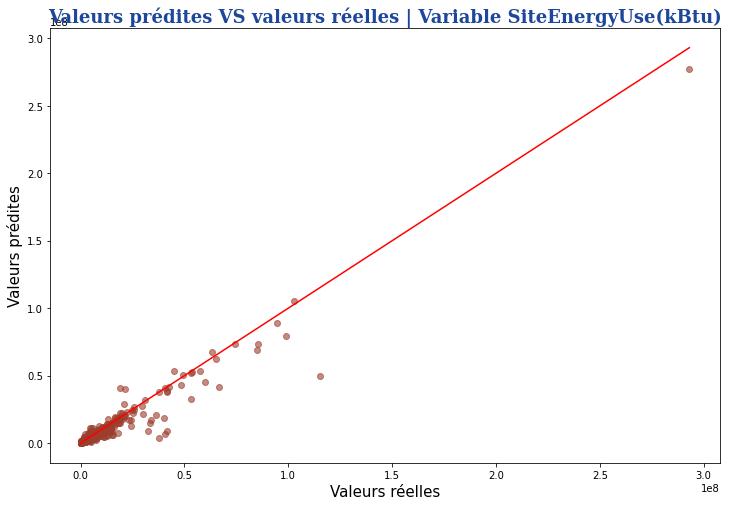

In [178]:
#Affichage des valeurs prédites par le meilleur modèle selectionné vs valeurs réelles pour SiteEnergyUse(kBtu)
plot_pred_true(EUI_y_test,Y_pred_EUI_rfr_grid , color="#9C3E2D", title="SiteEnergyUse(kBtu)")

In [103]:
#Les valeurs prédites sont en effet beaucoup plus reserrées sur la première bissectrice dû au bon modèle de prédiction.

In [104]:
 #Regardons maintenant l'importance des variables dans notre modèle selectionné pour la consommation d'énergie :

In [105]:
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
        
    ------
    Code from :
        https://johaupt.github.io/
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        feature_names.extend(get_names(trans))
    
    return feature_names

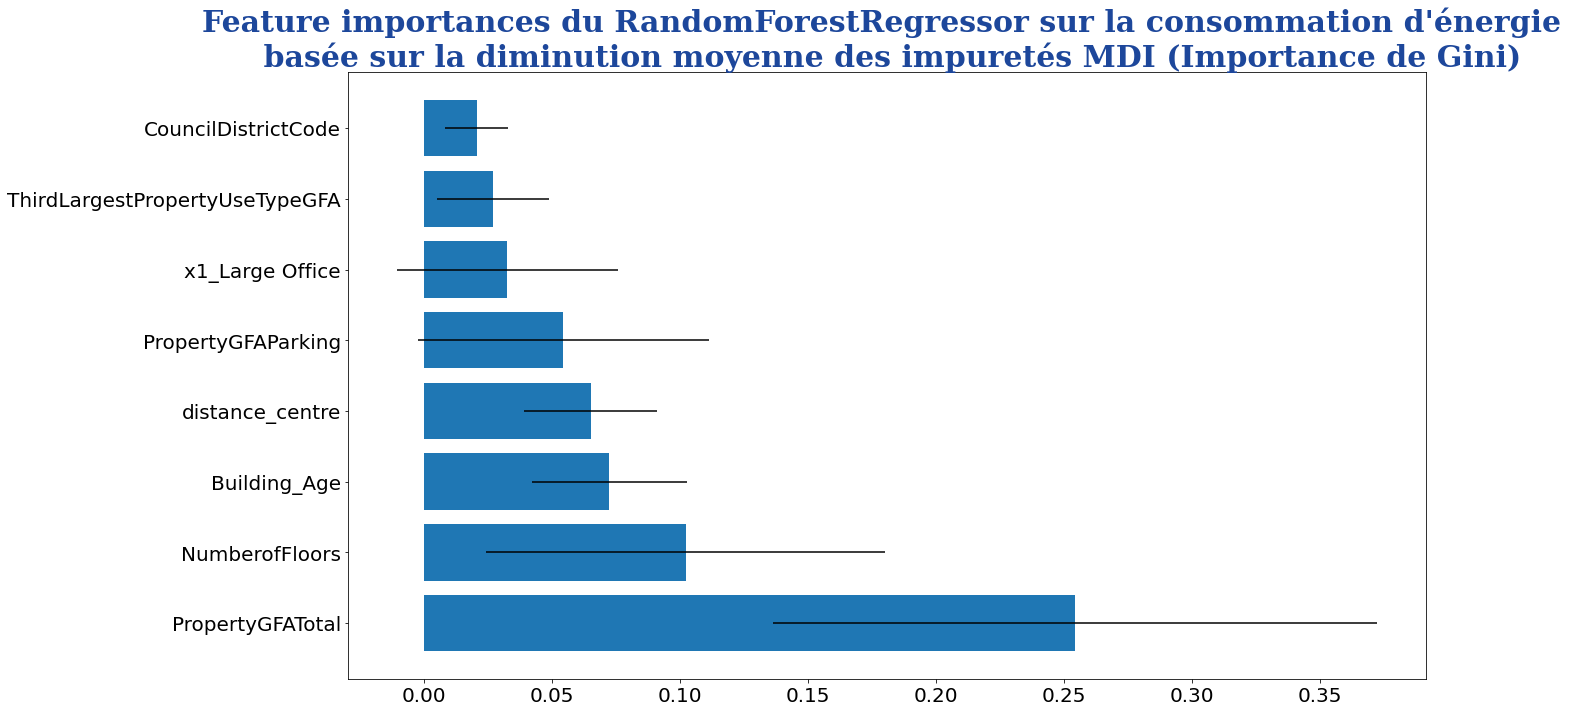

In [106]:
EUI_importances = EUI_rfr_model_grid.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
EUI_features_names = get_feature_names(EUI_rfr_model_grid.named_steps['preprocessor'])
EUI_std = np.std([tree.feature_importances_ for tree in EUI_rfr_model_grid.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)

EUI_df=pd.DataFrame()
EUI_df["EUI_features_names"]=EUI_features_names
EUI_df["EUI_importances"]=EUI_importances
EUI_df["EUI_std"]=EUI_std
EUI_df1=EUI_df.sort_values('EUI_importances',axis=0, ascending=False)



y_ticks = np.arange(0, 8)
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(y_ticks, EUI_df1.iloc[0:8,1],xerr=EUI_df1.iloc[0:8,2], align="center")       
ax.set_yticks(y_ticks)
ax.set_yticklabels(EUI_df1.iloc[0:8,0],fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_title("Feature importances du RandomForestRegressor sur la consommation d'énergie \n basée sur la diminution moyenne des impuretés MDI (Importance de Gini)",fontdict=font_title, fontsize=30)
fig.tight_layout()
plt.show()

In [107]:
GHG_metrics4

,Métrique (TotalGHGEmissions),LinearRegression GridSearch,RandomForestRegressor GridSearch,LinearSVR GridSearch,ElasticNet GridSearch,XGBRegressor RandomizedSearchCV
0,R²,0.341484,0.925861,-0.056053,-0.034552,0.930948
1,RMSE,436.311301,146.397997,552.530167,546.876549,141.286222


In [108]:
#3.2-Modèle de prédiction des émissions de CO2

#Pour la variable SiteEnergyUse, le modèle RandomForestRegressor offre à nouveau 
#les meilleures valeurs du Coefficient de détermination (R²) et 
#de la racine de l'erreur quadratique moyenne RMSE 
#Nous allons donc séléctionner le modèle RandomForestRegressor pour prédire la variable TotalGHGEmissions. 


In [109]:
#les paramètres optimaux pour le modèle selectionné sont obtenus à l'aide d’une validation croisée :
meilleur_params_GHG_rfr_grid=GHG_rfr_model_grid.named_steps["grid_search_rfr"].best_params_
meilleur_params_GHG_rfr_grid

{'regressor__bootstrap': False,
 'regressor__max_depth': 300,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [110]:
#c'est le même pour les deux variables

In [111]:
#Nous allons vérifier la distribution des valaurs prédites en fonction des valeurs réélles

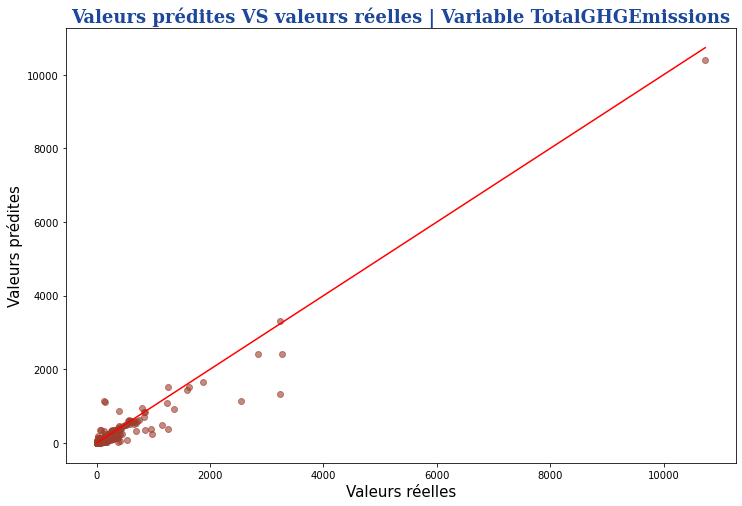

In [179]:
#1-Affichage des valeurs prédites vs valeurs réelles pour émissions de CO2
plot_pred_true(GHG_y_test,Y_pred_GHG_rfr_grid , color="#9C3E2D", title="TotalGHGEmissions")

In [113]:
 #Regardons maintenant l'importance des variables dans notre modèle selectionné pour les émissions de CO2:

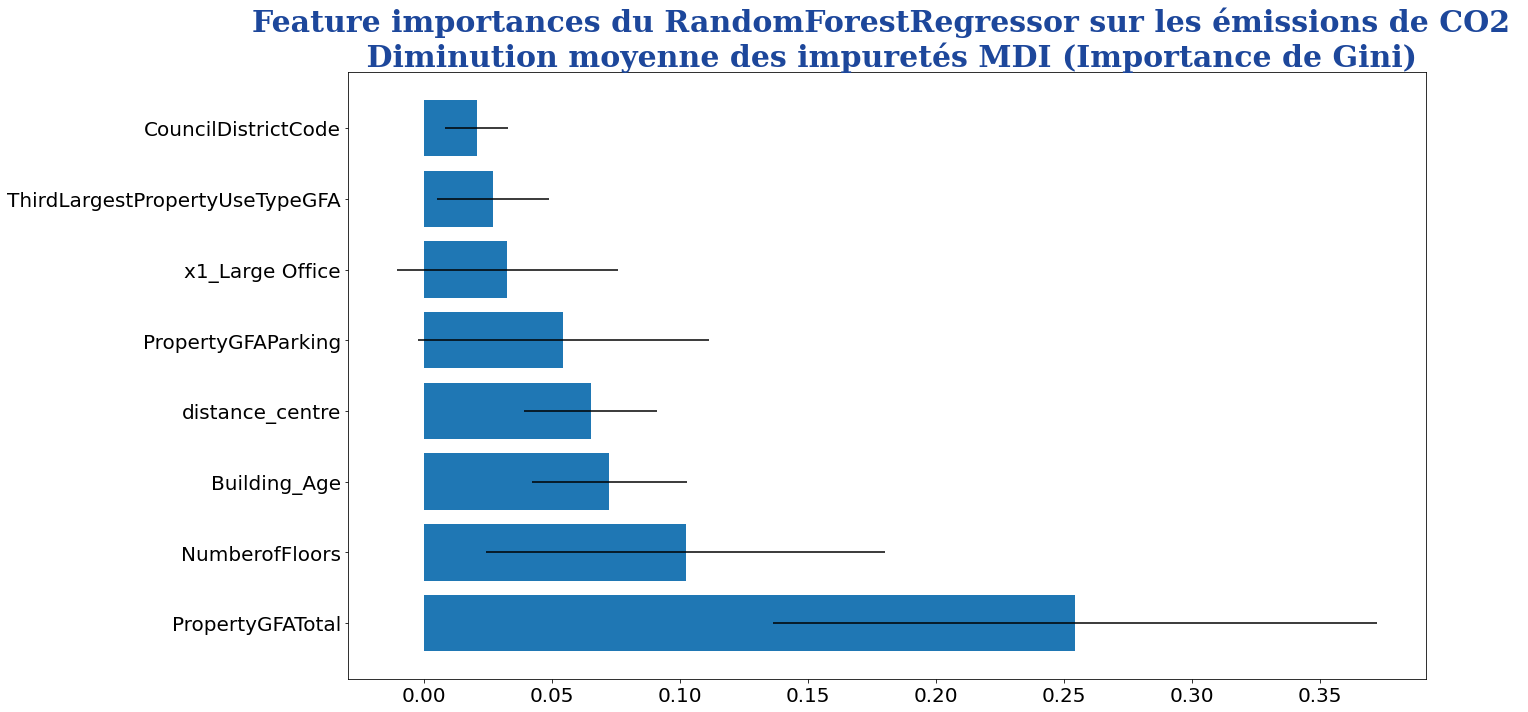

In [114]:
GHG_importances = GHG_rfr_model_grid.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
GHG_features_names = get_feature_names(GHG_rfr_model_grid.named_steps['preprocessor'])

GHG_std = np.std([tree.feature_importances_ for tree in GHG_rfr_model_grid.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
GHG_df=pd.DataFrame()
GHG_df["GHG_features_names"]=GHG_features_names
GHG_df["GHG_importances"]=GHG_importances
GHG_df["GHG_std"]=GHG_std
GHG_df1=GHG_df.sort_values('GHG_importances',axis=0, ascending=False)



y_ticks = np.arange(0, 8)
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(y_ticks, GHG_df1.iloc[0:8,1], xerr=GHG_df1.iloc[0:8,2],align="center")     
ax.set_yticks(y_ticks)
ax.set_yticklabels(GHG_df1.iloc[0:8,0],fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_title("Feature importances du RandomForestRegressor sur les émissions de CO2 \n Diminution moyenne des impuretés MDI (Importance de Gini)",fontdict=font_title, fontsize=30)
fig.tight_layout()
plt.show()


In [115]:
#4-Evaluer l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions :

In [116]:
numerical_cols = data.select_dtypes(include=['int64','float64'])
categorical_cols= data.select_dtypes(exclude=['int64','float64']) 

In [117]:
numerical_cols.shape

(3156, 13)

In [118]:
categorical_cols.shape

(3156, 6)

In [119]:
data_ESS=pd.concat([categorical_cols, numerical_cols], axis=1)
data_ESS.reset_index(inplace=True, drop=True)

In [120]:
data_ESS.shape

(3156, 19)

In [121]:
data_ESS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BuildingType                    3156 non-null   object 
 1   PrimaryPropertyType             3156 non-null   object 
 2   Neighborhood                    3156 non-null   object 
 3   LargestPropertyUseType          3156 non-null   object 
 4   SecondLargestPropertyUseType    3156 non-null   object 
 5   ThirdLargestPropertyUseType     3156 non-null   object 
 6   CouncilDistrictCode             3156 non-null   int64  
 7   NumberofBuildings               3156 non-null   float64
 8   NumberofFloors                  3156 non-null   float64
 9   PropertyGFATotal                3156 non-null   int64  
 10  PropertyGFAParking              3156 non-null   int64  
 11  ThirdLargestPropertyUseTypeGFA  3156 non-null   float64
 12  ENERGYSTARScore                 20

In [122]:
#Extraction des données ayant un ENERGYSTARScore renseigné puisque il y avait des données manquantes dans cette variable
data_ESS = data_ESS[data_ESS['ENERGYSTARScore'].isnull()==False]

In [123]:
data_ESS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 3140
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BuildingType                    2086 non-null   object 
 1   PrimaryPropertyType             2086 non-null   object 
 2   Neighborhood                    2086 non-null   object 
 3   LargestPropertyUseType          2086 non-null   object 
 4   SecondLargestPropertyUseType    2086 non-null   object 
 5   ThirdLargestPropertyUseType     2086 non-null   object 
 6   CouncilDistrictCode             2086 non-null   int64  
 7   NumberofBuildings               2086 non-null   float64
 8   NumberofFloors                  2086 non-null   float64
 9   PropertyGFATotal                2086 non-null   int64  
 10  PropertyGFAParking              2086 non-null   int64  
 11  ThirdLargestPropertyUseTypeGFA  2086 non-null   float64
 12  ENERGYSTARScore                 20

In [124]:
X = data_ESS.drop(['TotalGHGEmissions','GHGEmissionsIntensity','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)'], axis=1)
Y = data_ESS[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

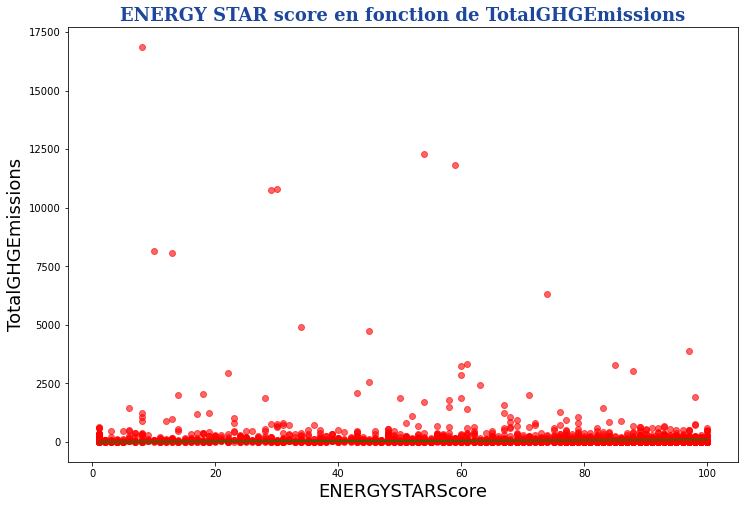

In [125]:
# la distribution de ENERGYSTARScore ainsi que sa relation avec les émissions de CO2
X_plot = [X["ENERGYSTARScore"].min(), X["ENERGYSTARScore"].max()]
fig = plt.figure(figsize=(12,8))
plt.scatter(X["ENERGYSTARScore"], Y['TotalGHGEmissions'], color='r', alpha=.6)
plt.plot(X_plot, X_plot, color='g')
plt.xlabel("ENERGYSTARScore",fontsize=18)
plt.ylabel("TotalGHGEmissions",fontsize=18)
plt.title("ENERGY STAR score en fonction de TotalGHGEmissions", fontdict=font_title, fontsize=18)
plt.show()

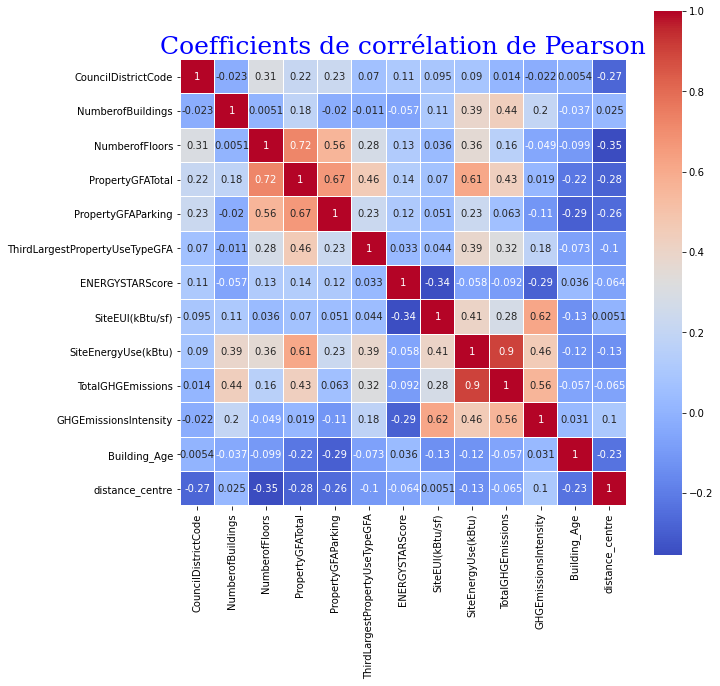

In [126]:
#analyser les corrélations linéaires entre les variables
matrice_corr = data_ESS.corr()
#visualiser les resultats dans un heatmap
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrice_corr, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font)
plt.show()

In [127]:
#On remarque que  ENERGYSTARScore n'a pas de corrélation linéaire avec les émissions de CO2.
#donc on va tester l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions en utilisant 
#le meilleur modèle selectionné RandomForestRegressor qui est non linéaire 


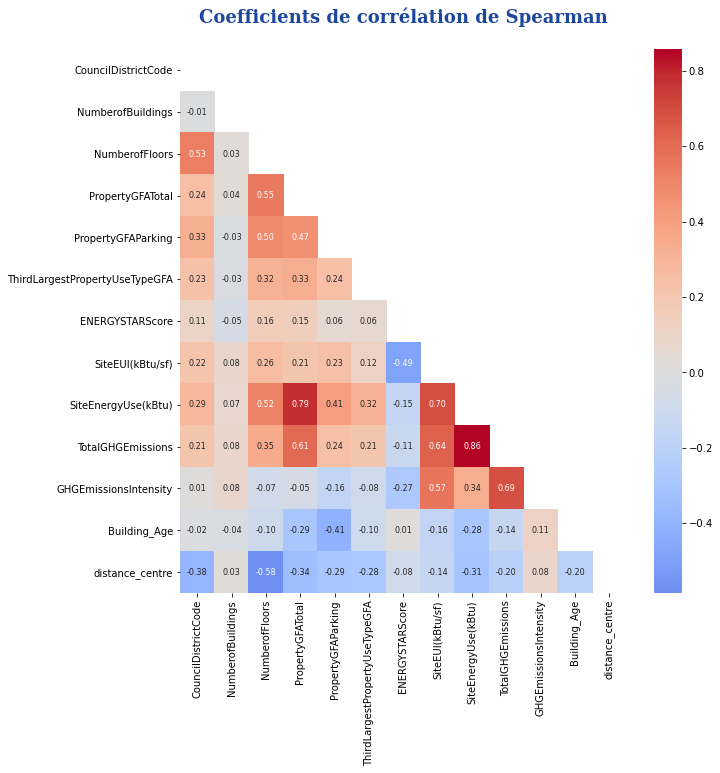

In [128]:
matrice_corr3 = data_ESS.corr(method='spearman')
matrice_corr3
mask = np.zeros_like(matrice_corr3)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(matrice_corr3, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Coefficients de corrélation de Spearman\n", 
          fontdict=font_title)
plt.show()

In [129]:
#Entrainons  à nouveau le meilleur modèle selectionné sur la variable TotalGHGEmissions dans le nouveau
#jeu des données en incluant ENERGYSTARScore et par la suite sans ENERGYSTARScore puis camparer les resultats obtenus 

In [130]:
#incluant ENERGYSTARScore

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_transformer = StandardScaler()



numerical_cols=  X.select_dtypes(include=['int64','float64']).columns
categorical_cols= X.select_dtypes(exclude=['int64','float64']).columns
 

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols),
    ('numeric', numeric_transformer, numerical_cols)])

GHG_ESS_x_train,GHG_ESS_x_test, GHG_ESS_y_train, GHG_ESS_y_test = train_test_split(X, Y['TotalGHGEmissions'], test_size=0.3, random_state=42)

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50,100,300,500],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv_ESS = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_ESS', GridSearchCV(
                            TransformedTargetRegressor(
                            regressor=RandomForestRegressor(),
                            func=np.log1p,
                            inverse_func=np.expm1),
                            param_grid=param_rfr,
                            cv=5,
                            n_jobs = -1))])


In [131]:
GHG_rfr_model_grid_ESS = rfr_grid_cv_ESS.fit(GHG_ESS_x_train, GHG_ESS_y_train)

In [132]:
results_GHG_rfr_grid_ESS= pd.DataFrame.from_dict(GHG_rfr_model_grid_ESS.named_steps["grid_search_rfr_ESS"].cv_results_).sort_values('rank_test_score')
results_GHG_rfr_grid_ESS

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
216,1.909245,0.037498,0.037498,0.012499,False,25,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.868548,0.694542,0.710256,0.955932,0.041027,0.654061,0.321788,1
264,2.121729,0.041219,0.034373,0.006249,False,100,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.839476,0.635847,0.720525,0.953530,0.035717,0.637019,0.319283,2
240,2.099856,0.040259,0.040623,0.012499,False,50,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.834874,0.613710,0.698061,0.960820,0.031823,0.627858,0.320657,3
312,2.118605,0.039029,0.040622,0.007654,False,500,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.813721,0.661067,0.687582,0.942198,0.028957,0.626705,0.315183,4
192,1.194444,0.045755,0.035234,0.004484,False,15,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.852214,0.586408,0.698492,0.957428,0.029056,0.624720,0.323782,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.353797,0.015904,0.026386,0.001854,False,5,log2,10,2,"{'regressor__bootstrap': False, 'regressor__ma...",-0.001288,0.015104,-0.000107,0.019468,-0.006358,0.005364,0.010054,332
190,0.345201,0.007834,0.025986,0.000632,False,5,log2,10,5,"{'regressor__bootstrap': False, 'regressor__ma...",0.005877,0.014405,-0.007077,0.011131,-0.006246,0.003618,0.008827,333
23,0.431221,0.021194,0.021873,0.007655,True,5,log2,10,10,"{'regressor__bootstrap': True, 'regressor__max...",-0.012503,0.018755,-0.014682,0.003457,-0.007848,-0.002564,0.012364,334
21,0.406221,0.009881,0.024998,0.007654,True,5,log2,10,2,"{'regressor__bootstrap': True, 'regressor__max...",-0.010741,0.015931,-0.015913,0.000407,-0.008544,-0.003772,0.011175,335


In [133]:
mean_test_score_GHG_rfr_ESS_grid= GHG_rfr_model_grid_ESS.named_steps["grid_search_rfr_ESS"].best_score_
mean_test_score_GHG_rfr_ESS_grid

0.6540608604469774

In [134]:
meilleur_params_GHG_rfr_grid_ESS=GHG_rfr_model_grid_ESS.named_steps["grid_search_rfr_ESS"].best_params_
meilleur_params_GHG_rfr_grid_ESS

{'regressor__bootstrap': False,
 'regressor__max_depth': 25,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [135]:

Y_pred_GHG_rfr_grid_ESS =GHG_rfr_model_grid_ESS.predict(GHG_ESS_x_test)

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_ESS_y_test, Y_pred_GHG_rfr_grid_ESS)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_ESS_y_test, Y_pred_GHG_rfr_grid_ESS ,squared=False)))


r2 (TotalGHGEmissions)  : 0.6642828165564554
rmse (TotalGHGEmissions) :254.43438249859352


In [136]:
GHG_metrics_rlm_grid_ESS = metrics(GHG_ESS_y_test, Y_pred_GHG_rfr_grid_ESS).rename(columns={'Métrique':'Métrique (TotalGHGEmissions) ','model':'RandomForestRegressor avec ENERGYSTARScore '})
GHG_metrics_rlm_grid_ESS

,Métrique (TotalGHGEmissions),RandomForestRegressor avec ENERGYSTARScore
0,R²,0.664283
1,RMSE,254.434382


In [137]:
#Maintenant sans ENERGYSTARScore
X1 = data_ESS.drop(['ENERGYSTARScore','TotalGHGEmissions','GHGEmissionsIntensity','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)'], axis=1)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_transformer = StandardScaler()



numerical_cols1=  X1.select_dtypes(include=['int64','float64']).columns
categorical_cols1= X1.select_dtypes(exclude=['int64','float64']).columns
 

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols1),
    ('numeric', numeric_transformer, numerical_cols1)])

GHG_S_x_train,GHG_S_x_test, GHG_S_y_train, GHG_S_y_test = train_test_split(X1, Y['TotalGHGEmissions'], test_size=0.3, random_state=42)

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50,100,300,500],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv_S = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_S', GridSearchCV(
                            TransformedTargetRegressor(
                            regressor=RandomForestRegressor(),
                            func=np.log1p,
                            inverse_func=np.expm1),
                            param_grid=param_rfr,
                            cv=5,
                            n_jobs = -1))])

In [138]:
GHG_rfr_model_grid_without = rfr_grid_cv_S.fit(GHG_S_x_train, GHG_S_y_train)

In [139]:
results_GHG_rfr_grid_without= pd.DataFrame.from_dict(GHG_rfr_model_grid_without.named_steps["grid_search_rfr_S"].cv_results_).sort_values('rank_test_score')
results_GHG_rfr_grid_without

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
216,1.912369,0.037757,0.046872,0.009882,False,25,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.817595,0.680966,0.816390,0.945337,0.029009,0.657860,0.325354,1
264,2.140478,0.035629,0.043747,0.011692,False,100,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.857337,0.688785,0.711926,0.962011,0.036610,0.651334,0.323084,2
192,1.174920,0.020728,0.028123,0.006250,False,15,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.849363,0.636164,0.781714,0.949469,0.031174,0.649577,0.325550,3
276,2.341283,0.026308,0.038798,0.008849,False,100,log2,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.866422,0.668977,0.738350,0.944311,0.026060,0.648824,0.325858,4
312,2.207121,0.042117,0.040622,0.012500,False,500,sqrt,1,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.854622,0.669368,0.683034,0.954933,0.034350,0.639261,0.320864,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.321852,0.012498,0.031249,0.009881,False,5,log2,10,5,"{'regressor__bootstrap': False, 'regressor__ma...",0.001306,0.013850,-0.004326,0.016081,-0.008563,0.003670,0.009765,332
189,0.356225,0.030296,0.028124,0.006250,False,5,log2,10,2,"{'regressor__bootstrap': False, 'regressor__ma...",0.000463,0.004829,-0.003573,0.011671,-0.006139,0.001450,0.006320,333
21,0.421846,0.019763,0.028123,0.006250,True,5,log2,10,2,"{'regressor__bootstrap': True, 'regressor__max...",-0.013571,0.012694,-0.016271,0.003519,-0.008893,-0.004505,0.010955,334
23,0.431221,0.015933,0.031249,0.009882,True,5,log2,10,10,"{'regressor__bootstrap': True, 'regressor__max...",-0.015048,0.004990,-0.012802,0.000374,-0.007559,-0.006009,0.007642,335


In [140]:
mean_test_score_GHG_rfr_without_grid= GHG_rfr_model_grid_without.named_steps["grid_search_rfr_S"].best_score_
mean_test_score_GHG_rfr_without_grid

0.6578595458884807

In [141]:
meilleur_params_GHG_rfr_grid_without=GHG_rfr_model_grid_without.named_steps["grid_search_rfr_S"].best_params_
meilleur_params_GHG_rfr_grid_without

{'regressor__bootstrap': False,
 'regressor__max_depth': 25,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [142]:
Y_pred_GHG_rfr_grid_without =GHG_rfr_model_grid_without.predict(GHG_S_x_test)

print("r2 (TotalGHGEmissions)  : "+str(r2_score(GHG_S_y_test, Y_pred_GHG_rfr_grid_without)))
    
print("rmse (TotalGHGEmissions) :"+str(mean_squared_error(GHG_S_y_test, Y_pred_GHG_rfr_grid_without ,squared=False)))

r2 (TotalGHGEmissions)  : 0.7188101212557856
rmse (TotalGHGEmissions) :232.8567626554986


In [143]:
GHG_metrics_rfr_grid_without = metrics(GHG_S_y_test, Y_pred_GHG_rfr_grid_without).rename(columns={'Métrique':'Métrique (TotalGHGEmissions) ','model':'RandomForestRegressor sans ENERGYSTARScore'})
GHG_metrics_ESS = pd.concat([GHG_metrics_rlm_grid_ESS,GHG_metrics_rfr_grid_without["RandomForestRegressor sans ENERGYSTARScore"]], axis=1)
GHG_metrics_ESS

,Métrique (TotalGHGEmissions),RandomForestRegressor avec ENERGYSTARScore,RandomForestRegressor sans ENERGYSTARScore
0,R²,0.664283,0.718810
1,RMSE,254.434382,232.856763


In [144]:
#Conclusion :
#Le résultat obtenu avec ENERGYSTARScore est moins bon que le modèle sans ENERGYSTARScore ou on peut dire presque pareil,
#en plus il faut également prendre en compte le coût de calcule de cette variable qui est un peu renseigné dans 
#le jeu des données initial (il y a 1070 observations en moins)

In [145]:
#Complément Classification 

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders.target_encoder import TargetEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc

In [147]:
def evaluation(Y_tr, Y_pr, title = 'Matrice de confusion'):
    matrice_conf= confusion_matrix(Y_tr, Y_pr)
    #print(matrice_conf)
    #matrice_conf.shape
    #'micro', 'macro', 'weighted', 'samples'
    precision1 = precision_score(Y_tr, Y_pr,average='macro')
    recall1 = recall_score(Y_tr, Y_pr,average='macro')
    accuracy1 = accuracy_score(Y_tr,Y_pr)
    Fmesure1= f1_score(Y_tr,Y_pr,average='macro')
    print('Rappel: '+str(recall1))
    print('Accuracy: '+str(accuracy1))
    print('Precision: '+str(precision1))
    print('F-mesure: '+str(Fmesure1))
    sns.heatmap(matrice_conf,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('Prédite', fontsize=18)
    plt.ylabel('Réelle', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

In [148]:
from sklearn.metrics import roc_auc_score

In [149]:
def cross_val(model, cv,X,y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])
    pipeline2 = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)])
    train_accuracy = []
    test_accuracy= []
    
    for train_i, val_i in cv.split(X_train, Y_train):
        X_t, Y_t = X_train.iloc[train_i], Y_train[train_i]
        pipeline.fit(X_t, Y_t)
        Y_pred_t = pipeline.predict(X_t)
        train_accuracy.append(accuracy_score(Y_t, Y_pred_t))
        X_val, Y_val = X_train.iloc[val_i], Y_train[val_i]
        #pipeline.fit(X_val, Y_val)
        Y_pred_val = pipeline.predict(X_val)
        test_accuracy.append(accuracy_score(Y_val, Y_pred_val))
    #print(evaluation(Y_val, Y_pred_val))
        
    #print("precision ",precision_score(Y_val, Y_pred_val,average=None))
    pipeline2.fit(X_train, Y_train)
    y_pred = pipeline2.predict(X_test)
    print(evaluation(Y_test, y_pred))
    clf = pipeline2.fit(X_train, Y_train)
    print('roc_auc_score ',roc_auc_score(Y_test, clf.predict_proba(X_test), multi_class='ovr'))
    print('Training Accuracy: {}'.format(np.mean(train_accuracy)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_accuracy)))
    print('\n')
    #print(evaluation(Y_t, Y_pred_t))

In [150]:
data_model.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'CouncilDistrictCode',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Building_Age', 'distance_centre'],
      dtype='object')

In [151]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#categorical_transformer =TargetEncoder()
#categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()


from scipy.stats import norm


X = data_model.drop(['TotalGHGEmissions','GHGEmissionsIntensity','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)'], axis=1)
numerical_cols=  X.select_dtypes(include=['int64','float64']).columns
categorical_cols= X.select_dtypes(exclude=['int64','float64']).columns
 

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols),
    ('numeric', numeric_transformer, numerical_cols)])

In [152]:
#-Modèle de prédiction de l'intensité des émissions de CO2


In [153]:

#les classe des émissions de gaz à effet de serre GES sont les suivantes :

#La Classe A regroupe les bâtiments émettant moins de 0.5 kgCO2e/ft2 (Bâtiment BBC) ;
#La Classe B regroupe les bâtiments émettant 0.6 à 1 kgCO2e/ft2 ;
#La Classe C regroupe les bâtiments émettant 1.1 à 2 kgCO2e/ft2 ;
#La Classe D regroupe les bâtiments émettant 2.1 à 3.5 kgCO2e/ft2 ;
#La Classe E regroupe les bâtiments émettant 3.6 à 5.5 kgCO2e/ft2 ;
#La Classe F regroupe les bâtiments émettant 5.6 à 8.0 kgCO2e/ft2 ;
#La Classe G regroupe les bâtiments émettant plus de 8.0 kgCO2e/ft2.

In [154]:
#Déterminer les classes correspondantes aux valeurs de GHGEmissionsIntensity
bin_labels=['A', 'B','C','D','E','F','G']
data_model['GHG_score(kgCO2e/ft2)'] = pd.cut(x=data_model['GHGEmissionsIntensity'], bins=[-100,0.5,1,2,3.5,5.5,8,1000],labels=bin_labels)

In [155]:
data_model.isnull().any()

BuildingType                      False
PrimaryPropertyType               False
Neighborhood                      False
LargestPropertyUseType            False
SecondLargestPropertyUseType      False
ThirdLargestPropertyUseType       False
CouncilDistrictCode               False
NumberofBuildings                 False
NumberofFloors                    False
PropertyGFATotal                  False
PropertyGFAParking                False
ThirdLargestPropertyUseTypeGFA    False
SiteEUI(kBtu/sf)                  False
SiteEnergyUse(kBtu)               False
TotalGHGEmissions                 False
GHGEmissionsIntensity             False
Building_Age                      False
distance_centre                   False
GHG_score(kgCO2e/ft2)             False
dtype: bool

In [156]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BuildingType                    3156 non-null   object  
 1   PrimaryPropertyType             3156 non-null   object  
 2   Neighborhood                    3156 non-null   object  
 3   LargestPropertyUseType          3156 non-null   object  
 4   SecondLargestPropertyUseType    3156 non-null   object  
 5   ThirdLargestPropertyUseType     3156 non-null   object  
 6   CouncilDistrictCode             3156 non-null   int64   
 7   NumberofBuildings               3156 non-null   float64 
 8   NumberofFloors                  3156 non-null   float64 
 9   PropertyGFATotal                3156 non-null   int64   
 10  PropertyGFAParking              3156 non-null   int64   
 11  ThirdLargestPropertyUseTypeGFA  3156 non-null   float64 
 12  SiteEUI(kBtu/sf)    

In [157]:

label_encoder=LabelEncoder()
y = data_model['GHG_score(kgCO2e/ft2)']
y = LabelEncoder().fit_transform(y)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

Rappel: 0.5318074356501921
Accuracy: 0.5956907477820025
Precision: 0.5653251298300191
F-mesure: 0.5445214846641754


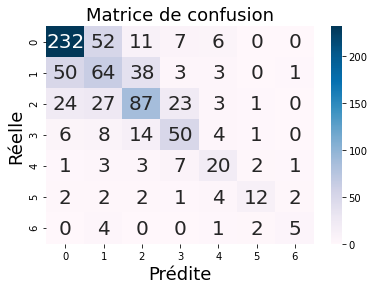

None
roc_auc_score  0.7294368727896613
Training Accuracy: 1.0


Validation Accuracy: 0.5162808538728468




In [158]:
#Evaluation de DecisionTreeClassifier:

cross_val(DecisionTreeClassifier(), KFold(),X,y)

Rappel: 0.26549136528839706
Accuracy: 0.4448669201520912
Precision: 0.3171075977710635
F-mesure: 0.2701539764397106


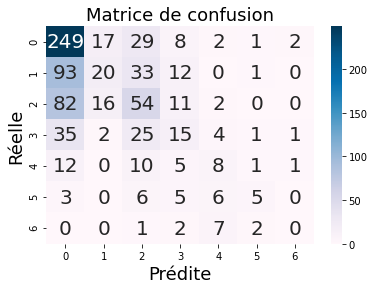

None
roc_auc_score  0.7687457276883399
Training Accuracy: 0.5425637498459004


Validation Accuracy: 0.4461405339827477




In [159]:
#Evaluation de LogisticRegressionCV:
from sklearn.linear_model import LogisticRegressionCV

cross_val(LogisticRegression(multi_class='multinomial', solver='newton-cg'), KFold(),X,y)

In [160]:
#Conclusion :
#
#Pour la variable GHGEmissionsIntensity , le modèle DecisionTreeClassifier offre 
#les meilleures valeurs de la precision et de la Validation Accuracy
#Nous allons donc séléctionner le modèle DecisionTreeClassifier pour prédire Les classes des émissions de gaz 

In [161]:
#-Modèle de prédiction de l'intensité de consommation d'énrgie SiteEUI(kBtu/sf) :

In [162]:

X1 = data_model.drop(['TotalGHGEmissions','GHGEmissionsIntensity','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)','GHG_score(kgCO2e/ft2)'], axis=1)
numerical_cols1=  X1.select_dtypes(include=['int64','float64']).columns
categorical_cols1= X1.select_dtypes(exclude=['int64','float64']).columns
 

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_cols1),
    ('numeric', numeric_transformer, numerical_cols1)])

In [163]:
#Lettre A : excellente performance énergétique, pour un logement dont la consommation est inférieure à 15.85 kBtu/sf
#Lettre B : très bonne performance énergétique, pour un logement dont la consommation est comprise entre 15.86 et 28.53 kBtu/sf 
#Lettre C : bonne+  performance énergétique, pour un logement dont la consommation est comprise entre 28.54 et 47.55 kBtu/sf 
#Lettre D : bonne performance énergétique, pour un logement dont la consommation est comprise entre 47.56 et 72.91 kBtu/sf 
#Lettre E : performance énergétique moyenne, pour un logement dont la consommation est comprise entre 72.92 et 104.61 kBtu/sf 
#Lettre F : performance énergétique faible, pour un logement dont la consommation est comprise entre 104.62 et 142.65 kBtu/sf
#Lettre G : mauvaise performance énergétique, pour un logement dont la consommation est supérieure à 142.65 kBtu/sf

In [164]:
#Déterminer les classes correspondantes aux valeurs de SiteEUI(kBtu/sf)
EUI_bin_labels=['A', 'B','C','D','E','F','G']
data_model['EUI_score(kBtu/sf)'] = pd.cut(x=data_model['SiteEUI(kBtu/sf)'], bins=[-100,15.85,28.53,47.55,72.91,104.61,142.65,10000],labels=EUI_bin_labels)

In [165]:
data_model.isnull().any()

BuildingType                      False
PrimaryPropertyType               False
Neighborhood                      False
LargestPropertyUseType            False
SecondLargestPropertyUseType      False
ThirdLargestPropertyUseType       False
CouncilDistrictCode               False
NumberofBuildings                 False
NumberofFloors                    False
PropertyGFATotal                  False
PropertyGFAParking                False
ThirdLargestPropertyUseTypeGFA    False
SiteEUI(kBtu/sf)                  False
SiteEnergyUse(kBtu)               False
TotalGHGEmissions                 False
GHGEmissionsIntensity             False
Building_Age                      False
distance_centre                   False
GHG_score(kgCO2e/ft2)             False
EUI_score(kBtu/sf)                False
dtype: bool

In [166]:
label_encoder=LabelEncoder()
y1 = data_model['EUI_score(kBtu/sf)']
y1 = LabelEncoder().fit_transform(y)


X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, random_state=42)
from sklearn.utils.multiclass import type_of_target
type_of_target(y1)

'multiclass'

Rappel: 0.5315091434472462
Accuracy: 0.5868187579214195
Precision: 0.532609377220168
F-mesure: 0.5296000944458715


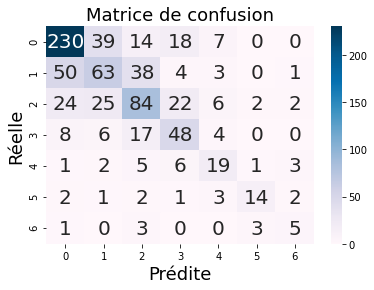

None
roc_auc_score  0.7260967857128445
Training Accuracy: 1.0


Validation Accuracy: 0.5162844220836568




In [167]:
#Evaluation de DecisionTreeClassifier:
cross_val(DecisionTreeClassifier(), KFold(),X1,y1)

Rappel: 0.26549136528839706
Accuracy: 0.4448669201520912
Precision: 0.3171075977710635
F-mesure: 0.2701539764397106


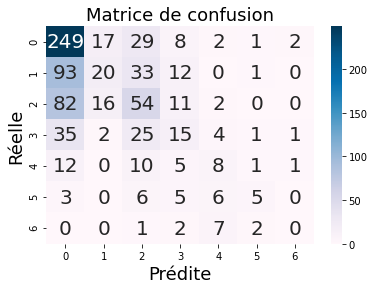

None
roc_auc_score  0.7687457276883399
Training Accuracy: 0.5425637498459004


Validation Accuracy: 0.4461405339827477




In [168]:
#Evaluation de LogisticRegressionCV:

cross_val(LogisticRegression(multi_class='multinomial', solver='newton-cg'), KFold(),X1,y1)

In [169]:
#Conclusion :

#Pour la variable SiteEUI(kBtu/sf) , le modèle DecisionTreeClassifier offre 
#les meilleures valeurs de la precision et de la Validation Accuracy
#Nous allons donc séléctionner le modèle DecisionTreeClassifier pour prédire Les classes de la consommation d'énergie 